In [110]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [39]:
# Loading the  Datasets

TCM2 = pd.read_csv('TCM2_Cleaned.csv')


C:\Users\Admin\AppData\Local\Temp\ipykernel_35424\1024121818.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  TCM2 = pd.read_csv('TCM2_Cleaned.csv')


In [40]:
TCM2.head(5)

,No.,Order_date,Create_date,Order_code,Executor,Customer_code,Customer_name,Year_of_Birth,Age,Phone_number,...,Order_terms,Payment_method,Payment_method_each_time,Payment date,Order source,Creator,Order_type,Order_#1,Customer_transfers,Customer_collects_CODE
0,1,31/07/2024,31/07/2024,DH26827,Diệu My,KH17171,"KH 17171 Mai Thị Thanh Huyền 1998(ĐNBT,TTY)",1998.0,26.0,965260898,...,Thời gian giao hàng: \nĐịa điểm giao hàng:,Tiền mặt,Chuyển khoản,05/08/2024 00:00,CSKH - Khách mua thêm thuốc khác trong quá trì...,TCM2B Diệu My,Đơn lần 1,1.0,KHÔNG,CÓ
1,2,0,0,0,0,0,0,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0,0,0,0,0,0,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,31/07/2024,31/07/2024,DH26826,Nguyễn Tường Vân,KH22024,Đỗ Quốc Vương,NaN,NaN,985969934,...,Thời gian giao hàng: \nĐịa điểm giao hàng:,Tiền mặt,Chuyển khoản,05/08/2024 00:00,Tái đơn lần 2,TCM2C Tường Vân,Đơn lần 2,2.0,KHÔNG,CÓ
4,5,0,0,0,0,0,0,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print("Total records (rows) in the TCM2 Dataset : {}".format(TCM2.shape[0]))
print("Total features (columns) in the TCM2 Dataset : {}".format(TCM2.shape[1]))

Total records (rows) in the TCM2 Dataset : 87527
Total features (columns) in the TCM2 Dataset : 54


1.RFM

In [10]:
 #Convert the column to datetime, coerce any errors (like invalid date formats)
TCM2['Order_date'] = pd.to_datetime(TCM2['Order_date'], errors='coerce')

# Drop any rows where the conversion to datetime failed (optional, based on your data handling strategy)
TCM2 = TCM2.dropna(subset=['Order_date'])

# Now, get the maximum date
max_order_date = TCM2['Order_date'].max()
print(max_order_date)


2024-07-31 00:00:00


In [13]:
# Maximum Transaction Date or the latest transaction date.

max_order_date = max(TCM2['Order_date']).date()
max_order_date

datetime.date(2024, 7, 31)

In [15]:
# Taking the last transaction date as a reference date for comparision and 
# finding the number of days between a transaction date and last transaction date to compute the recency.

comparison_date = datetime.strptime(str(max_order_date), "%Y-%m-%d")

In [18]:
# Creating an RFM table with recency, frequency, and monetary values.
TCM2_rfm_table = TCM2.groupby(['Customer_code']).agg({
    'Order_date': lambda date: (comparison_date - date.max()).days,  # Recency
    'Product_code': lambda prod_id: len(prod_id),  # Frequency (count of product codes)
    'Revenue': lambda p: sum(p)  # Monetary (sum of order amounts)
})

print(TCM2_rfm_table)


               Order_date  Product_code     Revenue
Customer_code                                      
KH 13921               64             2  17750000.0
KH0213                329             2   8570000.0
KH0224                 39             2   4870000.0
KH0543                 25             1   9475000.0
KH0703                345             2   7135000.0
...                   ...           ...         ...
KH9983                385             1   3290000.0
KH9985                308             3   3040000.0
KH9987                358             1  10225000.0
KH9995                127             2  10770000.0
KH9996                384             1    920000.0

[7466 rows x 3 columns]


In [20]:
# The columns in rfm_table dataframe are not properly named. Renaming of the columns to appropiate name is needed

TCM2_rfm_table.columns

Index(['Order_date', 'Product_code', 'Revenue'], dtype='object')

In [22]:
# Renaming column names to appropiate names

TCM2_rfm_table.rename(columns={'Order_date' : 'recency', 
                        'Product_code' : 'frequency',
                        'Revenue' : 'monetary'} , inplace=True)

In [24]:
print(TCM2_rfm_table['frequency'].describe())


count    7466.000000
mean        1.708545
std         1.093352
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        11.000000
Name: frequency, dtype: float64


In [27]:
TCM2_rfm_table['r_quartile'] = pd.cut(TCM2_rfm_table['recency'], 4, labels=['4','3','2','1'], duplicates='drop')
TCM2_rfm_table['f_quartile'] = pd.cut(TCM2_rfm_table['frequency'],4 , labels=['1','2','3','4'], duplicates='drop')
TCM2_rfm_table['m_quartile'] = pd.cut(TCM2_rfm_table['monetary'], 4, labels=['1','2','3','4'], duplicates='drop')


In [29]:
TCM2_rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
Customer_code,,,,,,
KH 13921,64,2,17750000.0,4,1,2
KH0213,329,2,8570000.0,1,1,1
KH0224,39,2,4870000.0,4,1,1
KH0543,25,1,9475000.0,4,1,1
KH0703,345,2,7135000.0,1,1,1
...,...,...,...,...,...,...
KH9983,385,1,3290000.0,1,1,1
KH9985,308,3,3040000.0,1,1,1
KH9987,358,1,10225000.0,1,1,1


In [31]:
# Caluclation of RFM Score.
# Max weightage is given to recency then frequency and then  monetary.
# Tính điểm RFM.
# Trọng số tối đa được đưa ra cho mức độ mới, sau đó là tần suất và sau đó là tiền tệ.

TCM2_rfm_table['rfm_score'] = 100*TCM2_rfm_table['r_quartile'].astype(int)+10*TCM2_rfm_table['f_quartile'].astype(int)+TCM2_rfm_table['m_quartile'].astype(int)

In [33]:
# Assigning a title to a customer.
# Platinum corresponds to highest range of RFM score down to Bronze to lowest range of RFM score.

TCM2_rfm_table['customer_title'] = pd.qcut(TCM2_rfm_table['rfm_score'], 4, ['Bronze','Silver','Gold','Platinum'])

In [35]:
TCM2_rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
Customer_code,,,,,,,,
KH 13921,64,2,17750000.0,4,1,2,412,Platinum
KH0213,329,2,8570000.0,1,1,1,111,Bronze
KH0224,39,2,4870000.0,4,1,1,411,Gold
KH0543,25,1,9475000.0,4,1,1,411,Gold
KH0703,345,2,7135000.0,1,1,1,111,Bronze
...,...,...,...,...,...,...,...,...
KH9983,385,1,3290000.0,1,1,1,111,Bronze
KH9985,308,3,3040000.0,1,1,1,111,Bronze
KH9987,358,1,10225000.0,1,1,1,111,Bronze


Merging both RFM with TCM2

In [56]:
TCM2_Tsgroup_rfm = pd.merge(TCM2,TCM2_rfm_table, left_on='Customer_code', right_on='Customer_code', how='inner')

In [55]:
TCM2_rfm_table = TCM2_rfm_table.drop(columns='Customer_code', errors='ignore')

In [59]:
TCM2_Tsgroup_rfm.info

<bound method DataFrame.info of        level_0  index    No.  Order_date Create_date Order_code  \
0            0      0      1  31/07/2024  31/07/2024    DH26827   
1            3      3      4  31/07/2024  31/07/2024    DH26826   
2           11     11     12  31/07/2024  31/07/2024    DH26825   
3           18     18     19  31/07/2024  31/07/2024    DH26824   
4           21     21     22  31/07/2024  31/07/2024    DH26823   
...        ...    ...    ...         ...         ...        ...   
12751    87489  87489  87490  01/07/2023  01/07/2023    DH11067   
12752    87503  87503  87504  01/07/2023  01/07/2023    DH11066   
12753    87506  87506  87507  01/07/2023  01/07/2023    DH11065   
12754    87508  87508  87509  01/07/2023  01/07/2023    DH11064   
12755    87511  87511  87512  01/07/2023  01/07/2023    DH11063   

               Executor Customer_code  \
0               Diệu My       KH17171   
1      Nguyễn Tường Vân       KH22024   
2             Quỳnh Mai       KH18458   

In [62]:
TCM2_Tsgroup_rfm['Age'] = TCM2_Tsgroup_rfm['Age'].fillna(0)  # Thay thế NaN bằng 0, hoặc bất kỳ giá trị nào bạn muốn


Creating an age group feature

In [63]:
TCM2_Tsgroup_rfm['Age_Group'] = TCM2_Tsgroup_rfm['Age'].apply(lambda x : (math.floor(x/10)+1)*10)

Creating a detail customer title/tag based on RFM Score

In [64]:
def cust_score_title_lkup(cols):
    
    rfm_score = cols[0]
    
    if rfm_score >= 444:
        return 'Platinum Customer'
    elif rfm_score >=433 and rfm_score < 444:
        return 'Very Loyal'
    elif rfm_score >=421 and rfm_score < 433:
        return 'Becoming Loyal'
    elif rfm_score >=344 and rfm_score < 421:
        return 'Recent Customer'
    elif rfm_score >=323 and rfm_score < 344:
        return 'Potential Customer'
    elif rfm_score >=311 and rfm_score < 323:
        return 'Late Bloomer'
    elif rfm_score >=224 and rfm_score < 311:
        return 'Loosing Customer'
    elif rfm_score >=212 and rfm_score < 224:
        return 'High Risk Customer'
    elif rfm_score >=124 and rfm_score < 212:
        return 'Almost Lost Customer'
    elif rfm_score >=112 and rfm_score < 124:
        return 'Evasive Customer'
    else :
        return 'Lost Customer'

In [66]:
# Applying the above functions and creating a new feature detail_cust_title

TCM2_Tsgroup_rfm['detail_cust_title']=TCM2_Tsgroup_rfm[['rfm_score']].apply(cust_score_title_lkup, axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_35424\4027663716.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rfm_score = cols[0]


In [67]:
# Function to provide ranks to the customers based on their title.

def get_rank(cols):
    
    title = cols[0]
    
    if title=='Platinum Customer':
        return 1
    elif title=='Very Loyal':
        return 2
    elif title == 'Becoming Loyal':
        return 3
    elif title == 'Recent Customer':
        return 4
    elif title=='Potential Customer':
        return 5
    elif title == 'Late Bloomer':
        return 6
    elif title == 'Loosing Customer':
        return 7
    elif title=='High Risk Customer':
        return 8
    elif title == 'Almost Lost Customer':
        return 9
    elif title == 'Evasive Customer':
        return 10
    else :
        return 11

In [68]:
# Applying the above functions and creating a new feature rank

TCM2_Tsgroup_rfm['rank']=TCM2_Tsgroup_rfm[['detail_cust_title']].apply(get_rank, axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_35424\782112168.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  title = cols[0]


2. Exporting to CSV File

In [70]:
TCM2_Tsgroup_rfm.to_csv('TCM2_Tsgroup_RFN_Analsysis.csv', index=False)

In [72]:
print("Total records in final dataset : {}".format(TCM2_Tsgroup_rfm.shape[0]))

Total records in final dataset : 12756


3. Data Analysis and Exploration

In [79]:
new_cust= pd.read_excel('c:\\Users\\Admin\\OneDrive\\Documents\\TS Group\\2024_2023_07\\TCM2_NewCustomer.xlsx', sheet_name='Sheet1')
print(new_cust.head())

   No.  Order_date Create_date Order_code     Executor Customer_code  \
0    1  31/07/2024  31/07/2024    DH26827      Diệu My       KH17171   
1   12  31/07/2024  31/07/2024    DH26825    Quỳnh Mai       KH18458   
2   19  31/07/2024  31/07/2024    DH26824   Phạm Thanh       KH20151   
3   22  31/07/2024  31/07/2024    DH26823    Quỳnh Mai       KH16957   
4   24  31/07/2024  31/07/2024    DH26822  Nguyễn Loan       KH22678   

                                 Customer_name  Year_of_Birth   Age  \
0  KH 17171 Mai Thị Thanh Huyền 1998(ĐNBT,TTY)         1998.0  26.0   
1                                   Vũ Thị Hậu            NaN   NaN   
2                              Nguyễn Thị Tính            NaN   NaN   
3                        Nguyễn Thị Ngọc Tuyết            NaN   NaN   
4                            Vàng Thị Xim 1994         1994.0  30.0   

   Phone_number  ...                                 Order_terms  \
0     965260898  ...  Thời gian giao hàng: \nĐịa điểm giao hàng:   
1   

C:\Users\Admin\AppData\Local\Temp\ipykernel_35424\4198746149.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_cust['Age'], kde=False, bins=15)


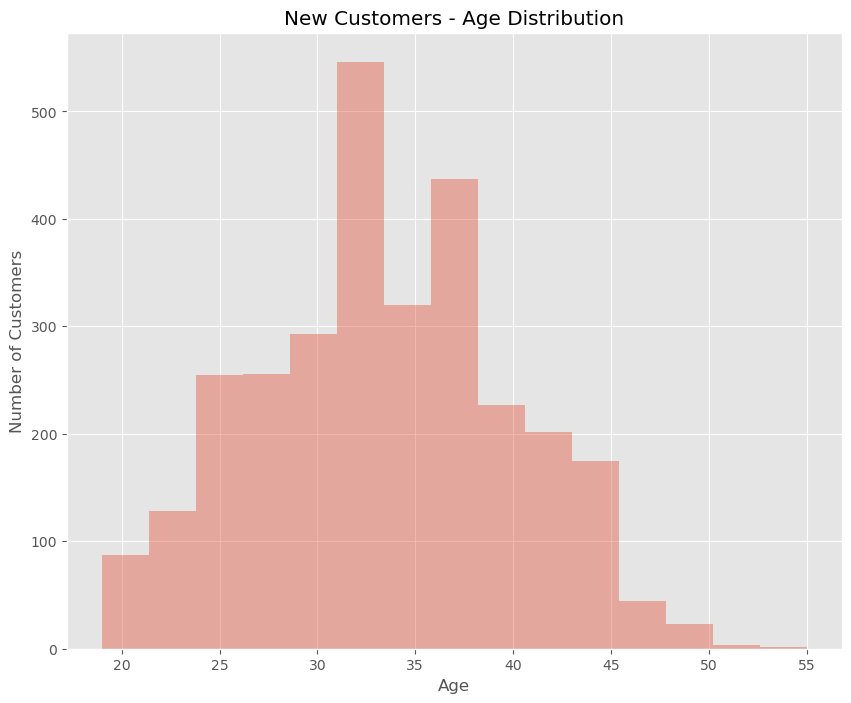

In [81]:
plt.figure(figsize=(10,8))
sns.distplot(new_cust['Age'], kde=False, bins=15)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('New Customers - Age Distribution')

plt.show()

In [84]:
old_cust= pd.read_excel('c:\\Users\\Admin\\OneDrive\\Documents\\TS Group\\2024_2023_07\\TCM2_OldCustomer.xlsx', sheet_name='Sheet1')
print(old_cust.head())

   No.  Order_date Create_date Order_code          Executor Customer_code  \
0    4  31/07/2024  31/07/2024    DH26826  Nguyễn Tường Vân       KH22024   
1   50  31/07/2024  31/07/2024    DH26817         Quỳnh Mai       KH24389   
2   66  31/07/2024  31/07/2024    DH26816       Tạ Thị Soan       KH24402   
3   80  31/07/2024  31/07/2024    DH26815         Quỳnh Mai       KH19379   
4   92  31/07/2024  31/07/2024    DH26814         Thanh Nga       KH24951   

                 Customer_name  Year_of_Birth   Age  Phone_number  ...  \
0                Đỗ Quốc Vương            NaN   NaN     985969934  ...   
1          Nguyễn Thị Huệ 1999         1999.0  25.0     386217539  ...   
2  KH 24402 Cao Thị Hương 1989         1989.0  35.0     353855011  ...   
3       Lưu Thị Thùy Linh 2001         2001.0  23.0     337002886  ...   
4   Trần Thị Ngọc Ánh SBD 7698            NaN   NaN     983244665  ...   

                                  Order_terms Payment_method  \
0  Thời gian giao hàng: \nĐị

C:\Users\Admin\AppData\Local\Temp\ipykernel_35424\446104277.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(old_cust['Age'], kde=False, bins=15)


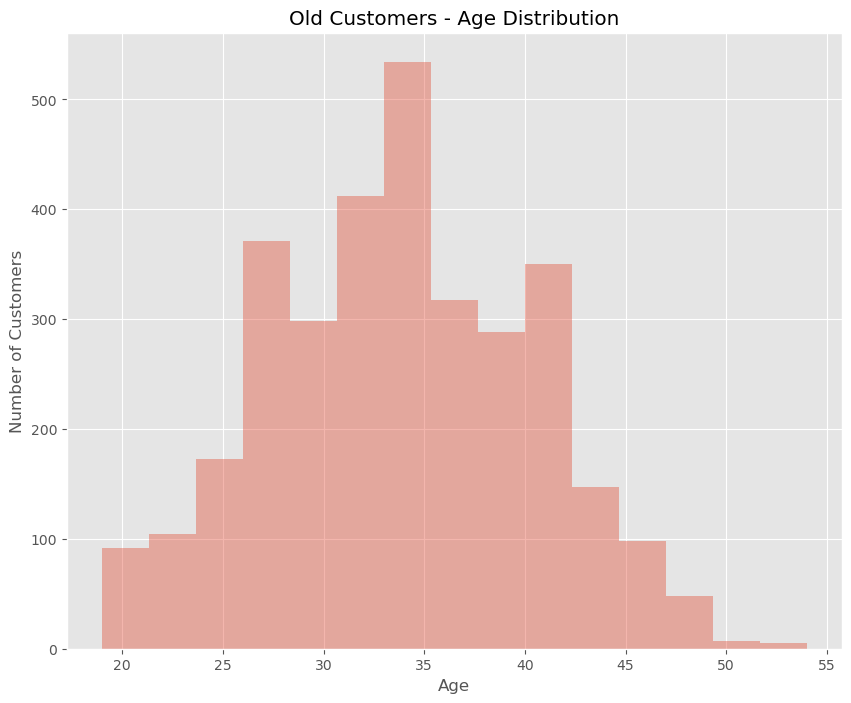

In [86]:
plt.figure(figsize=(10,8))
sns.distplot(old_cust['Age'], kde=False, bins=15)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Age Distribution')

plt.show()

Segmentation By Product_group

New Customer

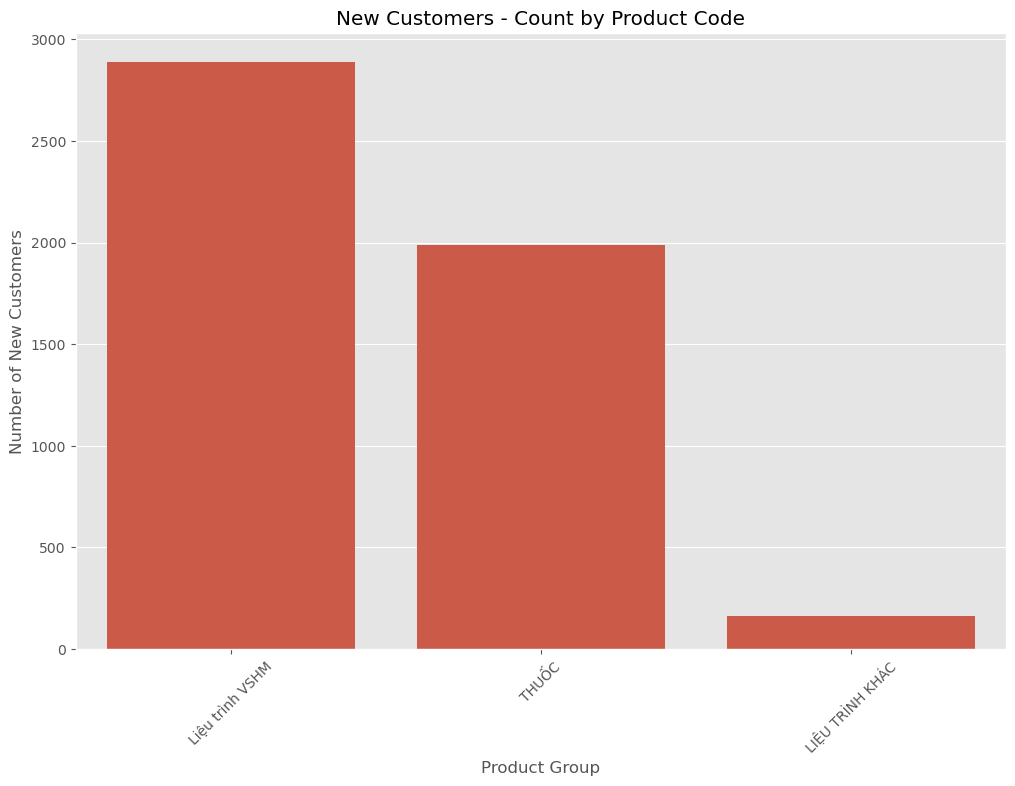

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử dataframe của bạn là new_cust với cột 'Product_Code' và 'Customer_ID'
plt.figure(figsize=(12, 8))

# Vẽ biểu đồ cột số lượng khách hàng theo mã sản phẩm
sns.countplot(x='Product_group', data=new_cust)

# Thêm tiêu đề và nhãn cho trục
plt.title('New Customers - Count by Product Code')
plt.xlabel('Product Group')
plt.ylabel('Number of New Customers')

# Xoay nhãn trục x để dễ đọc nếu mã sản phẩm dài
plt.xticks(rotation=45)

plt.show()


Old Customer

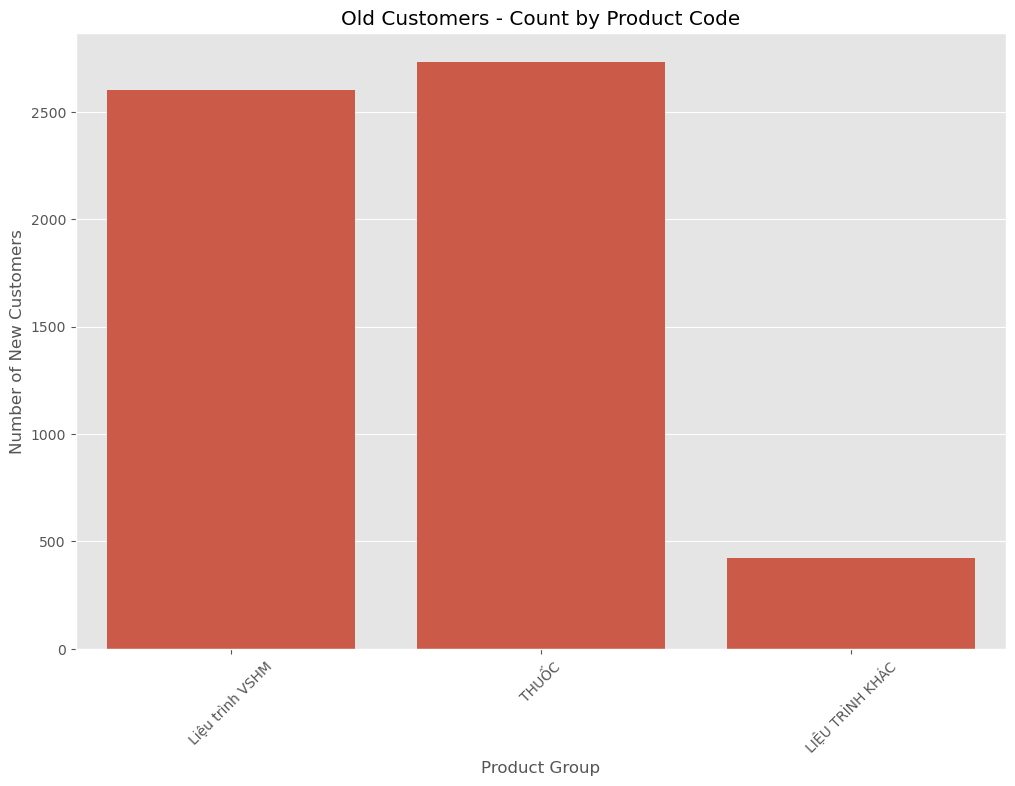

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử dataframe của bạn là new_cust với cột 'Product_Code' và 'Customer_ID'
plt.figure(figsize=(12, 8))

# Vẽ biểu đồ cột số lượng khách hàng theo mã sản phẩm
sns.countplot(x='Product_group', data=old_cust)

# Thêm tiêu đề và nhãn cho trục
plt.title('Old Customers - Count by Product Code')
plt.xlabel('Product Group')
plt.ylabel('Number of New Customers')

# Xoay nhãn trục x để dễ đọc nếu mã sản phẩm dài
plt.xticks(rotation=45)

plt.show()

4. RFM Analysis Scatter Plots

Recency vs Monetary

<Figure size 800x700 with 0 Axes>

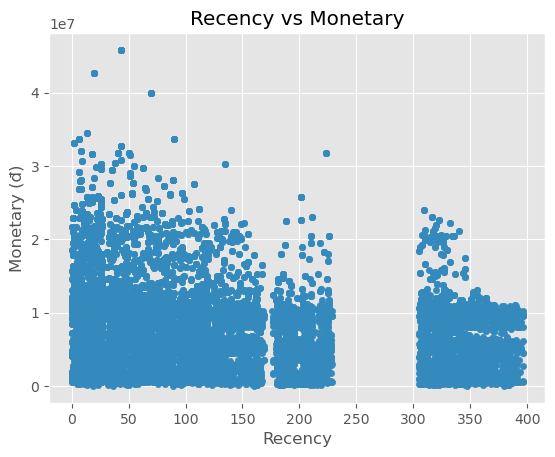

In [103]:
plt.figure(figsize=(8,7))
TCM2_Tsgroup_rfm.plot.scatter(x='recency' , y='monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary (đ)')
plt.title('Recency vs Monetary')
plt.show()

Frequency vs Monetary

<Figure size 800x700 with 0 Axes>

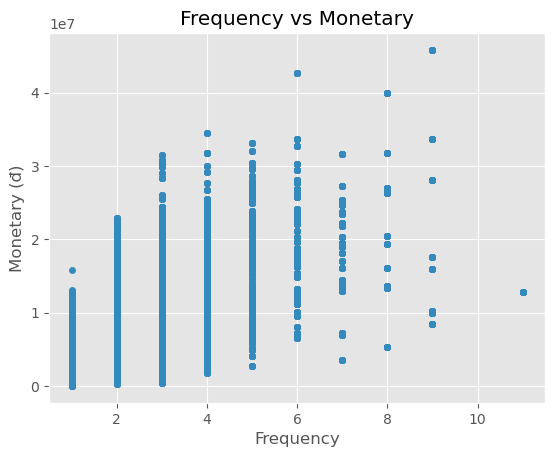

In [106]:
plt.figure(figsize=(8,7))
TCM2_Tsgroup_rfm.plot.scatter(x='frequency' , y='monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary (đ)')
plt.title('Frequency vs Monetary')
plt.show()

5. Customer Segment Distribution

#Finally we can plot the Number of Customers present under a Customer Segment
#Cuối cùng, chúng ta có thể biểu đồ Số lượng khách hàng hiện diện trong một Phân khúc khách hàng

In [107]:
# Calculating the number of unique customers under a customer title.

cust_per_title = TCM2_Tsgroup_rfm[['detail_cust_title', 'Customer_code','rank']].drop_duplicates().groupby(
    ['detail_cust_title','rank']).size().reset_index().sort_values('rank')

In [108]:
cust_per_title.rename(columns={0:'Number of Customers'}, inplace=True)
cust_per_title

,detail_cust_title,rank,Number of Customers
6,Platinum Customer,1,1
9,Very Loyal,2,20
1,Becoming Loyal,3,359
8,Recent Customer,4,2835
7,Potential Customer,5,3
4,Late Bloomer,6,1803
3,High Risk Customer,8,38
0,Almost Lost Customer,9,510
2,Evasive Customer,10,104
5,Lost Customer,11,1793


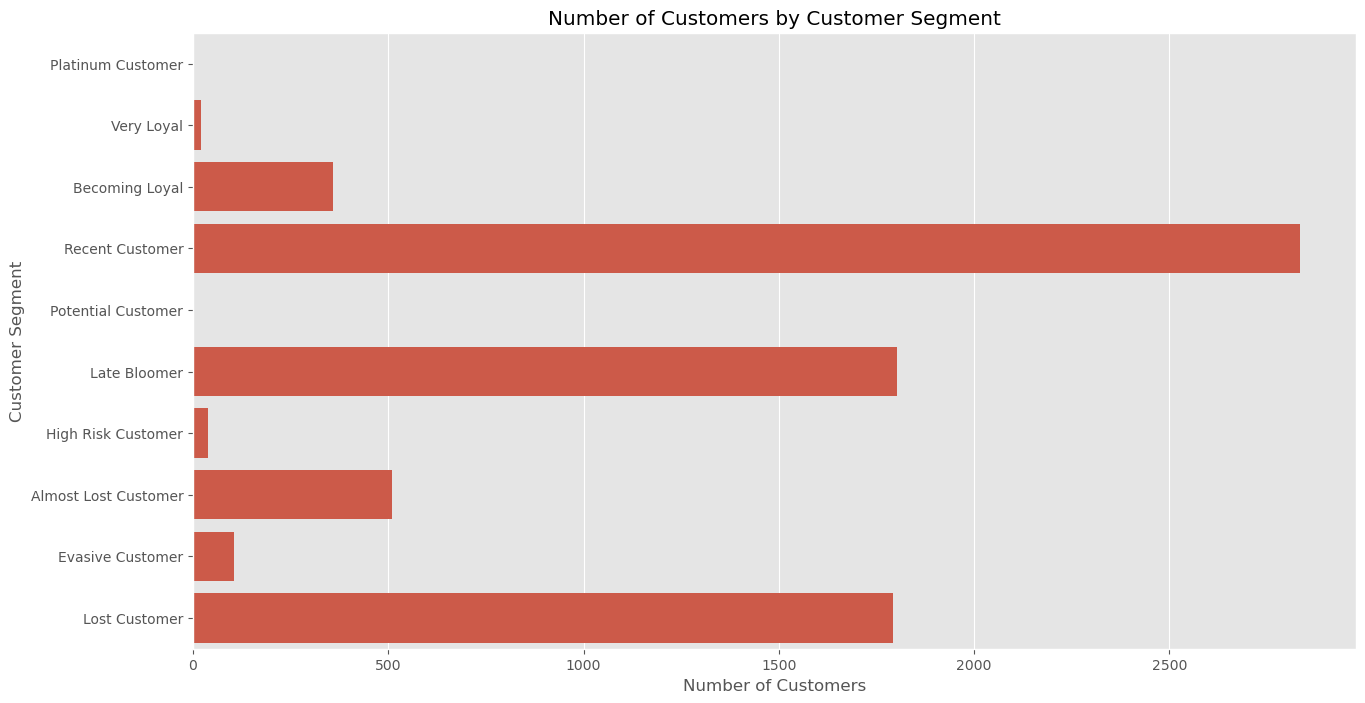

In [109]:
# Plotting the Number of Customers

plt.figure(figsize=(15,8))
sns.barplot(y='detail_cust_title' , x='Number of Customers', data=cust_per_title)
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segment')
plt.title('Number of Customers by Customer Segment')
plt.show()